# **Lab: Model Interpretation**



## Exercise 1: EDA and Baseline Model

In this exercise we will start our data science project by preparing the dataset for modeling.

The steps are:
1.   Setup Environment
2.   Add Functionalities to Custom Package
3.   Load and explore dataset
4.   Prepare Data
5.   Split Dataset
6.   Get Baseline model
7.   Push changes


### 1. Setup Environment

**[1.1]** Go to a folder of your choice on your computer (where you store projects)

In [ ]:
# Placeholder for student's code (command line)

In [ ]:
# Solution:
cd /Users/anthonyso/Projects/adv_mla_2024/

**[1.2]** Copy the cookiecutter data science template

In [ ]:
# Placeholder for student's code (command line)

In [ ]:
# Solution:
cookiecutter -c v1 https://github.com/drivendata/cookiecutter-data-science

Follow the prompt (name the project and repo adv_mla_lab_5)

**[1.3]** Go inside the created folder `adv_mla_lab_5`


In [ ]:
# Placeholder for student's code (command line)

In [ ]:
# Solution:
cd adv_mla_lab_5

**[1.4]** Initialise the repo

In [ ]:
# Placeholder for student's code (command line)

In [ ]:
# Solution:
git init

**[1.5]** Login into Github with your account (https://github.com/) and create a public repo with the name `adv_mla_lab_5`

**[1.6]** In your local repo `adv_mla_lab_5`, link it with Github (replace the url with your username)

In [ ]:
# Placeholder for student's code (command line)

In [ ]:
# Solution:
git remote add origin git@github.com:<username>/adv_mla_lab_5

**[1.7]** Set the python version to 3.11.4 with pyenv

In [ ]:
# Placeholder for student's code (command line)

In [ ]:
# Solution:
pyenv local 3.11.4

**[1.8]** Initialise poetry project with python==~3.11 and no dependencies installed

In [ ]:
# Placeholder for student's code (command line)

In [ ]:
# Solution
poetry init

**[1.9]** Install with poetry the following packages:
*   pandas==2.2.2
*   scikit-learn==1.5.1
*   jupyterlab==4.2.3
*   xgboost==2.1.0
*   hyperopt==0.2.7



In [ ]:
# Placeholder for student's code (command line)

In [ ]:
# Solution
poetry add jupyterlab==4.2.3 pandas==2.2.2 scikit-learn==1.5.1 xgboost==2.1.0 hyperopt==0.2.7

**[1.10]** Download the dataset into the sub-folder data/raw (https://raw.githubusercontent.com/aso-uts/labs_datasets/main/36120-adv_mla/lab03/yellow_tripdata_2020-04.csv)

In [ ]:
# For Windows users, you can download and install WGET. Or you can manually download the file from the link and save it to specified path
wget -P /Users/anthonyso/Projects/adv_mla_2024/adv_mla_lab_5/data/raw https://raw.githubusercontent.com/aso-uts/labs_datasets/main/36120-adv_mla/lab03/yellow_tripdata_2020-04.csv

**[1.11]** Add you changes to git staging area, commit and push them to Github

In [ ]:
# Placeholder for student's code (command line)

In [ ]:
# Solution:
git add .
git commit -m "init"
git push --set-upstream origin master

**[1.12]** Preventing push to `master` branch

In [ ]:
# Placeholder for student's code (command line)

In [ ]:
# Solution
git config branch.master.pushRemote no_push

**[1.13]** Create a new git branch called `data_prep`

In [ ]:
# Placeholder for student's code (command line)

In [ ]:
# Solution:
git checkout -b data_prep

**[1.14]** Launch Jupyter Lab from your virtual environment

In [ ]:
# Placeholder for student's code (command line)

In [ ]:
#Solution:
poetry run jupyter lab

**[1.15]** Navigate the folder `notebooks` and create a new jupyter notebook called `1_baseline.ipynb`

### 2.   Add Functionalities to Custom Package

**[2.1]** In the `features/` folder from your custom package, create a file called `dates.py`. Inside it you will define a function called `convert_to_date` with the following logics:
- input parameters: dataframe (`df`) and list of column names (`cols`)
- logics: convert all columns in `cols` into datetime
- output parameters: transformed dateframe

In [ ]:
# Placeholder for student's code (Python code)

In [ ]:
# Solution
def convert_to_date(df, cols:list):
    """Convert specified columns from a Pandas dataframe into datetime

    Parameters
    ----------
    df : pd.DataFrame
        Input dataframe
    cols : list
        List of columns to be converted

    Returns
    -------
    pd.DataFrame
        Pandas dataframe with converted columns
    """
    import pandas as pd

    for col in cols:
        if col in df.columns:
            df[col] = pd.to_datetime(df[col])
    return df

**[2.2]** In the `models/` folder from your custom package, create a script called `null.py` and define a class called `NullClassifier` with:
```
Attributes
    ----------
    y : Numpy Array-like
        Target variable
    pred_value : Float
        Value to be used for prediction
    preds : Numpy Array
        Predicted array

Methods
-------
    fit(y)
        Store the input target variable and calculate the predicted value to be used
    predict(y)
        Generate the predictions
    fit_predict(y)
        Perform a fit followed by predict
```

In [ ]:
# Placeholder for student's code (Python code)

In [ ]:
# Solution:
from scipy.stats import mode

class NullClassifier:
    """
    Class used as baseline model for classification problem
    ...

    Attributes
    ----------
    y : Numpy Array-like
        Target variable
    pred_value : Float
        Value to be used for prediction
    preds : Numpy Array
        Predicted array

    Methods
    -------
    fit(y)
        Store the input target variable and calculate the predicted value to be used
    predict(y)
        Generate the predictions
    fit_predict(y)
        Perform a fit followed by predict
    """


    def __init__(self):
        self.y = None
        self.pred_value = None
        self.preds = None

    def fit(self, y):
        self.y = y
        self.pred_value = mode(y).mode

    def predict(self, y):
        self.preds = np.full((len(y), 1), self.pred_value)
        return self.preds

    def fit_predict(self, y):
        self.fit(y)
        return self.predict(self.y)

**[2.3]** In the `models/performance.py` file from your custom package,, create a function called `print_classifier_scores` with the following logics:
- input parameters: predicted target (`y_preds`), actual target (`y_actuals`) and name of the set (`set_name`)
- logics: Print the Accuracy and F1 score for the provided data
- output parameters: None

In [ ]:
# Placeholder for student's code (Python code)

In [ ]:
# Solution:
def print_classifier_scores(y_preds, y_actuals, set_name=None):
    """Print the Accuracy and F1 score for the provided data.
    The value of the 'average' parameter for F1 score will be determined according to the number of distinct values of the target variable: 'binary' for bianry classification' or 'weighted' for multi-classs classification

    Parameters
    ----------
    y_preds : Numpy Array
        Predicted target
    y_actuals : Numpy Array
        Actual target
    set_name : str
        Name of the set to be printed
    Returns
    -------
    """
    from sklearn.metrics import accuracy_score
    from sklearn.metrics import f1_score
    import pandas as pd

    average = 'weighted' if pd.Series(y_actuals).nunique() > 2 else 'binary'

    print(f"Accuracy {set_name}: {accuracy_score(y_actuals, y_preds)}")
    print(f"F1 {set_name}: {f1_score(y_actuals, y_preds, average=average)}")

**[2.4]** Inside `models/performance.py` file from your custom package,, define a function called `assess_classifier_set` with the following logics:
- input parameters: trained model (`model`), features for a set (`features`), target for a set(`target`) and name of the set (`set_name`)
- logics: Save the predictions of the model and print the accuracy and F1 on the given set
- output parameters: None

In [ ]:
# Placeholder for student's code (Python code)

In [ ]:
# Solution:
def assess_classifier_set(model, features, target, set_name=''):
    """Save the predictions from a trained model on a given set and print its accuracy and F1 scores

    Parameters
    ----------
    model: sklearn.base.BaseEstimator
        Trained Sklearn model with set hyperparameters
    features : Numpy Array
        Features
    target : Numpy Array
        Target variable
    set_name : str
        Name of the set to be printed

    Returns
    -------
    """
    preds = model.predict(features)
    print_classifier_scores(y_preds=preds, y_actuals=target, set_name=set_name)


**[2.5]** Inside `models/performance.py` file from your custom package,, define a function called `fit_assess_classifier` with the following logics:
- input parameters: trained model (`model`), features for the training set (`X_train`), target for the training set(`y_train`), features for the validation set (`X_val`), target for the validation set(`y_val`)
- logics: Train the model on the training set and print its accuracy and F1 scores on the training and validation sets
- output parameters: None

In [ ]:
# Placeholder for student's code (Python code)

In [ ]:
# Solution:
def fit_assess_classifier(model, X_train, y_train, X_val, y_val):
    """Train a classifier model, print its accuracy and F1 scores on the training and validation set and return the trained model

    Parameters
    ----------
    model: sklearn.base.BaseEstimator
        Instantiated Sklearn model with set hyperparameters
    X_train : Numpy Array
        Features for the training set
    y_train : Numpy Array
        Target for the training set
    X_train : Numpy Array
        Features for the validation set
    y_train : Numpy Array
        Target for the validation set

    Returns
    sklearn.base.BaseEstimator
        Trained model
    -------
    """
    model.fit(X_train, y_train)
    assess_classifier_set(model, X_train, y_train, set_name='Training')
    assess_classifier_set(model, X_val, y_val, set_name='Validation')
    return model


**[2.6]** Add you changes to git staging area

In [ ]:
# Placeholder for student's code (command line)

In [ ]:
# Solution
git add .

**[2.7]** Create the snapshot of your repository and add a description

In [ ]:
# Placeholder for student's code (command line)

In [ ]:
# Solution
git commit -m "add classifier"

**[2.8]** Push your snapshot to Github

In [ ]:
# Placeholder for student's code (command line)

In [ ]:
# Solution
git push

**[2.9]** Version your package with Poetry

In [ ]:
# Placeholder for student's code (command line)

In [ ]:
# Solution:
poetry version 2024.0.1.2

**[2.10]** Build your package with Poetry

In [ ]:
# Placeholder for student's code (command line)

In [ ]:
# Solution:
poetry build

**[2.11]** Publish your built package to TestPypi

In [ ]:
# Placeholder for student's code (command line)

In [ ]:
# Solution:
poetry publish -r test-pypi

### 3.   Load and Explore Dataset

**[3.1]** Launch magic commands to automatically reload modules

In [ ]:
# Placeholder for student's code (Python code)

In [1]:
# Solution
%load_ext autoreload
%autoreload 2

**[3.2]** Install your custom package with pip

In [ ]:
# Placeholder for student's code (Python code)

In [2]:
# Solution
! pip install -i https://test.pypi.org/simple/ my-krml-studentid

Looking in indexes: https://test.pypi.org/simple/
  Using cached https://test-files.pythonhosted.org/packages/52/42/cccd42db9498a27a869d8486806c3d1d35f39366cc67cfee038969da0a5c/my_krml_studentid-0.1.9-py3-none-any.whl.metadata (1.3 kB)
Using cached https://test-files.pythonhosted.org/packages/52/42/cccd42db9498a27a869d8486806c3d1d35f39366cc67cfee038969da0a5c/my_krml_studentid-0.1.9-py3-none-any.whl (5.5 kB)


**[3.3]** Import the pandas and numpy packages

In [ ]:
# Placeholder for student's code (Python code)

In [3]:
# Solution
import pandas as pd
import numpy as np

**[3.4]** Load the dataset into a dataframe called `df`


In [4]:
# Placeholder for student's code (Python code)

In [5]:
# Solution:
df = pd.read_csv('../data/raw/yellow_tripdata_2020-04.csv')

/var/folders/6w/p9g2p0mj6c9dl_7mkq2m9n740000gn/T/ipykernel_4817/1843724163.py:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/raw/yellow_tripdata_2020-04.csv')


**[3.5]** Display the first 5 rows of `df`

In [6]:
# Placeholder for student's code (Python code)

In [7]:
# Solution
df.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,0,1.0,2020-04-01 00:41:22,2020-04-01 01:01:53,1.0,1.20,1.0,N,41,24,2.0,5.5,0.5,0.5,0.00,0.0,0.3,6.80,0.0
1,1,1.0,2020-04-01 00:56:00,2020-04-01 01:09:25,1.0,3.40,1.0,N,95,197,1.0,12.5,0.5,0.5,2.75,0.0,0.3,16.55,0.0
2,2,1.0,2020-04-01 00:00:26,2020-04-01 00:09:25,1.0,2.80,1.0,N,237,137,1.0,10.0,3.0,0.5,1.00,0.0,0.3,14.80,2.5
3,3,1.0,2020-04-01 00:24:38,2020-04-01 00:34:38,0.0,2.60,1.0,N,68,142,1.0,10.0,3.0,0.5,1.00,0.0,0.3,14.80,2.5
4,4,2.0,2020-04-01 00:13:24,2020-04-01 00:18:26,1.0,1.44,1.0,Y,263,74,1.0,6.5,0.5,0.5,3.00,0.0,0.3,13.30,2.5


**[3.6]** Display the dimensions of `df`

In [8]:
# Placeholder for student's code (Python code)

In [9]:
# Solution
df.shape

(237993, 19)

**[3.7]** Display the summary (info) of `df`

In [10]:
# Placeholder for student's code (Python code)

In [11]:
# Solution
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237993 entries, 0 to 237992
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             237993 non-null  int64  
 1   VendorID               218480 non-null  float64
 2   tpep_pickup_datetime   237993 non-null  object 
 3   tpep_dropoff_datetime  237993 non-null  object 
 4   passenger_count        218480 non-null  float64
 5   trip_distance          237993 non-null  float64
 6   RatecodeID             218480 non-null  float64
 7   store_and_fwd_flag     218480 non-null  object 
 8   PULocationID           237993 non-null  int64  
 9   DOLocationID           237993 non-null  int64  
 10  payment_type           218480 non-null  float64
 11  fare_amount            237993 non-null  float64
 12  extra                  237993 non-null  float64
 13  mta_tax                237993 non-null  float64
 14  tip_amount             237993 non-nu

**[3.8]** Display the descriptive statistics of `df`


In [12]:
# Placeholder for student's code (Python code)

In [13]:
# Solution
df.describe()

,Unnamed: 0,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
count,237993.000000,218480.000000,218480.000000,237993.000000,218480.000000,237993.000000,237993.000000,218480.000000,237993.000000,237993.000000,237993.000000,237993.000000,237993.000000,237993.000000,237993.000000,237993.000000
mean,118996.000000,1.564949,1.296764,4.039981,1.034081,154.908422,150.361414,1.425673,11.666027,1.066739,0.487000,1.530229,0.220504,0.296331,16.408621,1.927536
std,68702.805645,0.495765,0.983595,294.879052,0.865044,70.749496,74.474108,0.555915,11.728767,1.260170,0.094993,2.295523,1.342351,0.045429,13.155858,1.072839
min,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-118.000000,-4.500000,-0.500000,-5.000000,-19.870000,-0.300000,-138.170000,-2.500000
25%,59498.000000,1.000000,1.000000,0.950000,1.000000,97.000000,75.000000,1.000000,5.500000,0.000000,0.500000,0.000000,0.000000,0.300000,9.800000,2.500000
50%,118996.000000,2.000000,1.000000,1.740000,1.000000,143.000000,143.000000,1.000000,8.000000,0.500000,0.500000,1.000000,0.000000,0.300000,12.800000,2.500000
75%,178494.000000,2.000000,1.000000,3.400000,1.000000,234.000000,233.000000,2.000000,13.000000,2.500000,0.500000,2.460000,0.000000,0.300000,18.360000,2.500000
max,237992.000000,2.000000,7.000000,126501.770000,99.000000,265.000000,265.000000,4.000000,903.020000,7.000000,1.100000,117.280000,98.750000,0.300000,903.320000,2.500000


### 4. Prepare Data

**[4.1]** Create a copy of `df` and save it into a variable called `df_cleaned`

In [14]:
# Placeholder for student's code (Python code)

In [15]:
# Solution
df_cleaned = df.copy()

**[4.2]** Import the function `convert_to_date` from your custom package

In [16]:
# Placeholder for student's code (Python code)

In [17]:
# Solution
from my_krml_studentid.features.dates import convert_to_date

**[4.3]** Convert the column `tpep_pickup_datetime`, `tpep_dropoff_datetime` with your function `convert_to_date`

In [18]:
# Placeholder for student's code (Python code)

In [19]:
# Solution
df_cleaned = convert_to_date(df_cleaned, ['tpep_pickup_datetime', 'tpep_dropoff_datetime'])

**[4.4]** Create a new column `trip_duration` that will corresponds to the diuration of the trip in seconds (difference between `tpep_pickup_datetime` and `tpep_dropoff_datetime`)

In [20]:
# Placeholder for student's code (Python code)

In [21]:
# Solution
df_cleaned['trip_duration'] = (df_cleaned['tpep_dropoff_datetime'] - df_cleaned['tpep_pickup_datetime']).dt.total_seconds()

**[4.5]** Convert the `trip_duration` column into 5 different bins with [0, 300, 600, 1800, 300000]

In [22]:
# Placeholder for student's code (Python code)

In [23]:
# Solution
df_cleaned['trip_duration'] = pd.cut(df_cleaned['trip_duration'], bins=[-1, 300, 600, 1800, 300000], labels=[0, 1, 2, 3])

**[4.6]** Extract the month component from `tpep_pickup_datetime` and save the results in the column `tpep_pickup_dayofmonth`

In [24]:
# Placeholder for student's code (Python code)

In [25]:
# Solution
df_cleaned['tpep_pickup_dayofmonth'] = df_cleaned['tpep_pickup_datetime'].dt.day

**[4.7]** Extract the hour component from `tpep_pickup_datetime` and save the results in the column `tpep_pickup_hourofday`

In [26]:
# Placeholder for student's code (Python code)

In [27]:
# Solution
df_cleaned['tpep_pickup_hourofday'] = df_cleaned['tpep_pickup_datetime'].dt.hour

**[4.8]** Extract the day of week component from `tpep_pickup_datetime` and save the results in the column `tpep_pickup_dayofweek`

In [28]:
# Placeholder for student's code (Python code)

In [29]:
# Solution
df_cleaned['tpep_pickup_dayofweek'] = df_cleaned['tpep_pickup_datetime'].dt.dayofweek

**[4.9]** Perform One-Hot encoding on the categorical features (`VendorID`, `RatecodeID`, `store_and_fwd_flag`)

In [30]:
# Placeholder for student's code (Python code)

In [31]:
# Solution
df_cleaned = pd.get_dummies(df_cleaned, columns=['VendorID', 'RatecodeID', 'store_and_fwd_flag'])

**[4.10]** Drop the columns `tpep_pickup_datetime`, `tpep_dropoff_datetime`, `PULocationID`, `DOLocationID`

In [32]:
# Placeholder for student's code (Python code)

In [33]:
# Solution
df_cleaned.drop(['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'PULocationID', 'DOLocationID'], axis=1, inplace=True)

**[4.11]** Save the prepared dataframe in the `data/interim` folder

In [34]:
# Placeholder for student's code (Python code)

In [35]:
# Solution
df_cleaned.to_csv('../data/interim/yellow_tripdata_2020-04_prepared.csv', index=False)

### 5. Split Dataset

**[5.1]** Import the function `split_sets_random` from your custom package and split the data into several sets as Numpy arrays

In [36]:
# Placeholder for student's code (Python code)

In [37]:
# Solution
from my_krml_studentid.data.sets import pop_target, split_sets_random

features, target = pop_target(df_cleaned, target_col='trip_duration')
X_train, y_train, X_val, y_val, X_test, y_test = split_sets_random(features, target, test_ratio=0.2)

**[5.2]** Import the function `save_sets` from your custom package and save the sets into the folder `data/processed`

In [ ]:
# Placeholder for student's code (Python code)

In [39]:
# Solution
from my_krml_studentid.data.sets import save_sets

save_sets(X_train, y_train, X_val, y_val, X_test, y_test, path='../data/processed/')

### 6. Baseline Model

**[6.1]** Import the `NullClassifier` class from your custom package

In [40]:
# Placeholder for student's code (Python code)

In [41]:
# Solution:
from my_krml_studentid.models.null import NullClassifier

**[6.2]** Instantiate a `NullClassifier` and save it into a variable called `base_model`

In [42]:
# Placeholder for student's code (Python code)

In [43]:
# Solution:
base_model = NullClassifier()

**[6.3]** Make a prediction using `fit_predict()` and save the results in a variable called `y_base`

In [44]:
# Placeholder for student's code (Python code)

In [45]:
# Solution:
y_base = base_model.fit_predict(y_train)

**[6.4]** Import the function `print_classifier_scores` from your custom package and display the Accuracy and F1 scores of this baseline model on the training set

In [46]:
# Placeholder for student's code (Python code)

In [50]:
from my_krml_studentid.models.performance import print_classifier_scores

print_classifier_scores(y_preds=y_base, y_actuals=y_train, set_name='Training')

Accuracy Training: 0.34539024475646907
F1 Training: 0.17733802015864514


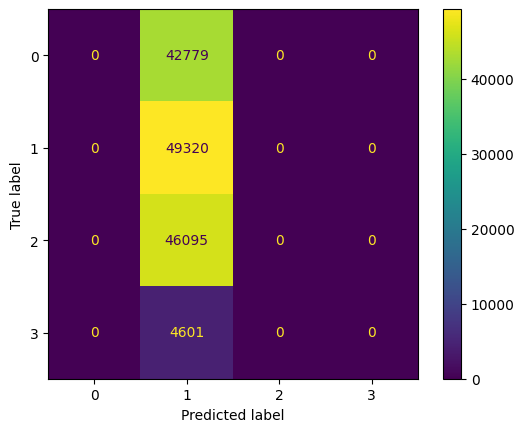

In [56]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_train, y_base, labels=[0, 1, 2, 3])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=[0, 1, 2, 3])
disp.plot()
plt.show()

### 7.   Push changes

**[7.1]** Add you changes to git staging area

In [ ]:
# Placeholder for student's code (command line)

In [ ]:
# Solution:
git add .

**[7.2]** Create the snapshot of your repository and add a description

In [ ]:
# Placeholder for student's code (command line)

In [ ]:
# Solution:
git commit -m "data prep"

**[7.3]** Push your snapshot to Github

In [ ]:
# Placeholder for student's code (command line)

In [ ]:
# Solution:
git push

**[7.4]** Go to Github and merge the branch after reviewing the code and fixing any conflict




**[7.5]** Check out to the master branch

In [ ]:
# Placeholder for student's code (command line)

In [ ]:
# Solution:
git checkout master

**[7.6]** Pull the latest updates

In [ ]:
# Placeholder for student's code (command line)

In [ ]:
# Solution:
git pull